In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm


# add the directory where fixed_income_derivatives.py is located to the system path
import sys
import os
sys.path.append(os.path.abspath("../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid

## Problem 3: Fitting a Vasicek model to data

### Setup

In [2]:
r0, a, b, sigma = 0.03, 0.5, 0.04, 0.04
T_max = 10
alpha = 0.25
M = int(T_max / alpha)+1
T = np.array([i*alpha for i in range(0,M)])
p = fid.zcb_price_vasicek(r0,a,b,sigma,T)
R = fid.spot_rate_vasicek(r0,a,b,sigma,T) # lol dunno why he defines R and p here...

# "DATA"
# timings 0-10 years
T = np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75,
5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9, 9.25, 9.5, 9.75, 10])

# rates
R = np.array([0.036, 0.03711, 0.03797, 0.03875, 0.03946, 0.0401, 0.04069, 0.04122, 0.04171, 0.04216, 0.04257, 0.04294, 0.04329,
0.0436, 0.0439, 0.04417, 0.04441, 0.04464, 0.04486, 0.04506, 0.04524, 0.04541, 0.04557, 0.04572, 0.04586, 0.04599, 0.04611,
0.04622, 0.04633, 0.04643, 0.04653, 0.04662, 0.0467, 0.04678, 0.04686, 0.04693, 0.047, 0.04706, 0.04712, 0.04718, 0.04724])

### (a)

In [10]:
param_0 = 0.03, 0.5, 0.04, 0.03
result = minimize(fid.fit_vasicek_obj,param_0,method='nelder-mead', args = (R,T), options={'xatol':1e-20,'disp':True})
print(f'Parameters from the fit:\n{result.x} \nSSE of fit:\n{result.fun}')
r0,a,b,sigma = result.x
p = fid.zcb_price_vasicek(r0,a,b,sigma,T)
f = fid.forward_rate_vasicek(r0,a,b,sigma,T)
T_swap = [1,2,3,4,5,6,7,8,9,10]
R_swap = np.zeros([10])
for i in range(0,10):
    R_swap[i] = fid.swap_rate_from_zcb_prices(0,0,T_swap[i],"quaterly",T,p)[0]
f_3m = fid.forward_rates_from_zcb_prices(T,p,horizon=1)

Parameters from the fit:
[0.036      0.60042112 0.0300103  0.01968804] 
SSE of fit:
2.5751868860945455e-10


/var/folders/yw/jsw5n53s1cb1s2q6tt0msrm00000gn/T/ipykernel_35895/1739808910.py:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(fid.fit_vasicek_obj,param_0,method='nelder-mead', args = (R,T), options={'xatol':1e-20,'disp':True})


IndexError: index 0 is out of bounds for axis 0 with size 0

range(0, 10)


In [9]:
R_swap[0]

0.0

NameError: name 'f_3m' is not defined

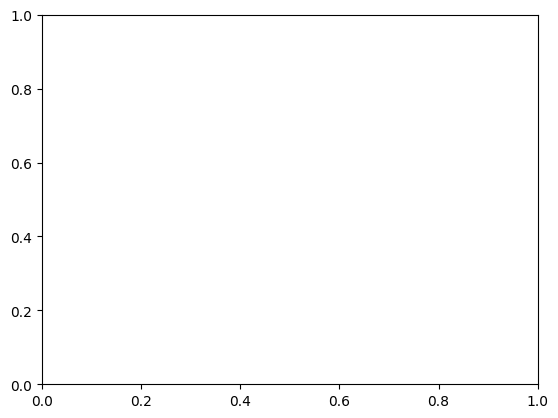

In [5]:
# Plot spot and forward rates
fig, ax1 = plt.subplots()

scatter1 = ax1.scatter(T, f_3m, label='Forward rates', alpha=0.5, marker='.', color='red')
scatter2 = ax1.scatter(T, R, label='Spot rates', alpha=0.5, marker='.', color='blue')
ax1.set_ylim([0, 0.055])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# Add bond prices to the plot on the right axis
ax2 = ax1.twinx()
scatter3 = ax2.scatter(T, p, label='ZCB prices', alpha=0.5, marker='.', color='black')
ax2.set_ylim([0, 1.1])
ax2.set_ylabel('Bond Prices')

# Combine legends
scatters = [scatter1, scatter2, scatter3]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Spot, Forward Rates and Bond')
plt.show()
plt.close()

## 4. Caplets

$$
\begin{align*}
x \text(quaterly) &= price\_cap(t=0) = \sum_{i=1}^N p(0,T_i) (T_i - T_{i-1}) y  \\
&= y \sum_{i=1}^N (T_i - T_{i-1}) \\
&= \alpha y \sum_{i=1}^N p(0,T_i), \quad \alpha = (T_i - T_{i-1}) = 0.25 \text{ or atleast always constant} \\
x &=  \alpha y S
\end{align*}
$$

Where $y$ is the premium paid annually in basispoints, $S$ is the som of payments, $\alpha$ is the time interval (then $\alpha y$ gives the premium paid each period)

## 5. Simulation of the Vasicek model

In [ ]:
M_simul, T_simul = 1000, 10
size_ci = 0.95

## 6. Pricing swaptions


In [ ]:
np.random.seed(2024)
T_n, T_N = 2, 10
M_simul_swaption, N_simul_swaption, T_simul_swaption = 1000, 1250, T_n
chi, price_swaption_simul, price_swaption_plot = np.zeros([N_simul_swaption]), np.zeros([N_simul_swaption]), np.zeros([N_simul_swaption])
T_swaption = np.array([i*0.25 for i in range(0, 33)])
for i in range(0, N_simul_swaption):
    r_simul_swaption = fid.simul_vasicek(r0,a,b,sigma,M,T_n,method='exact')
    p_swaption = fid.zcb_price_vasicek(r_simul_swaption[-1],a,b,sigma,T_swaption)
    R_swaption, S_swaption = fid.swap_rate_from_zcb_prices(0,0,10-2,'annual',T_swaption,p_swaption,float_freq='quaterly')
    chi[i] = np.max(R_swaption - strike,0) * S_swaption
    price_swaption_simul[i] = np.exp(-(T_simul_swaption/M_simul_swaption)*np.sum(r_simul_swaption))*chi[i]
    price_swaption_plot[i] = sum(price_swaption_simul[0:i+1])/(i+1) * 10000
print(f'Swaption price: {price_swaption_plot[-1]}')